Author: Giuseppe D'Auria

Latest changes: 30-07-23

Title: point in a triangle

Description: The purpose of this script is to try to write an algorithm to verify if a random point is inside an arbitrary triangle chosen.


Logic algorithm I used to implement the in_triangle method: 
1. take the triangle internal to the triangle under consideration formed by joining the midpoints of the sides;
2. construct the 3 heights of this triangle "internal" to the original triangle.
3. if the distance from the point is simultaneously less than these 3 heights, then the point is internal to the orgiginal triangle, otherwise it is external.

Remark: The frontier is included in my def of triangle.

In [1]:
class point:
    def __init__(point,x_coord, y_coord):
        point.x = x_coord
        point.y = y_coord

    def __repr__(self):
        return '({}, {})'.format(self.x, self.y)

    #def readable(self):
        #return '({0}, {1})'.format(
        #self.x,
        #self.y,
        #)

In [2]:
point(2,5)

(2, 5)

In [3]:
class line:
    def __init__(self, a1, a2):
        self.side1 = a1
        self.side2 = a2

    def __repr__(self):
        return 'segment of extremes points ({0}, {1}) e ({2}, {3})'.format(
            self.side1.x,
            self.side1.y,
            self.side2.x,
            self.side2.y
        )
    
    def middle_point(self):
        m_x = (self.side1.x + self.side2.x) / 2.0
        m_y = (self.side1.y + self.side2.y) / 2.0
        pM = point(m_x , m_y)
        return(pM)

    def slope(self):
        # m = (y_2 - y_1)/(x_2 - x_1)
        # q = y_1 - x_1 * (y_2 - y_1)/(x_2 - x_1)
        # y = m * x + q
        if (self.side2.x - self.side1.x)==0:   #pathological case: line parallel to the y-axis
            return print("line parallel to y-axis")  
        else:
            m = (self.side2.y - self.side1.y)/(self.side2.x - self.side1.x)
            return(m)
    
    def intercept(self):
        if (self.side2.x - self.side1.x)==0:
            return 
        else:
            q = self.side1.y - self.side1.x * (self.side2.y - self.side1.y)/(self.side2.x -  self.side1.x)
            return(q)
    
    def distance(self, pnt_x, pnt_y):
        import math
        # d(P,r)= |y_p - (m * x_P + q)| / sqrt(1 + m**2)
        
        #P = point(pnt)
        x_P = pnt_x
        y_P = pnt_y
        
        if (self.side2.x - self.side1.x)==0: 
            d = abs(x_P - self.side1.x) # cure of pathological case: when having line // y-axis distance reduces  
            return(d)                   # to be the absolute value of the difference between x-coords
        
        else:
            d = abs(y_P - (self.slope() * x_P + self.intercept() )) / math.sqrt(1 + (self.slope() ** 2) )
            return(d)
    
    def contain(self, pnt_x, pnt_y):
        if self.distance( pnt_x, pnt_y) == 0 :
            return(True)
        else:
            return(False)
        
    def lenght(self):
        import math
        l = math.sqrt(
            (self.side1.x + self.side2.x) **2 + (self.side1.y + self.side2.y) **2 
            )
        return(l)

In [4]:
a1 = point(0 , 0)
a2 = point(0 , 1)
segment = line( a1 , a2 )

print(segment)

mid1 = segment.middle_point()
print("mid point = ", mid1)

emme = segment.slope()
print("slope = ", emme)

qu = segment.intercept()
print("intercepts at the origin = ", qu)

random_point = (0.5 , 0.5)
distance = segment.distance(random_point[0], random_point[1])
print("point chosen = ",random_point)
print("distance point-segment = ",distance)

#random_point1 = (1 , 2)
#distance = segment.distance(random_point1[0], random_point1[1])
#print("point chosen1 = ",random_point1)
#print("distance point-segment = ",distance)

check = segment.contain(random_point[0], random_point[1])
print("Is the point within the segment? ", check)

lenght = segment.lenght()
print("segment lenght = ", lenght)


segment of extremes points (0, 0) e (0, 1)
mid point =  (0.0, 0.5)
line parallel to y-axis
slope =  None
intercepts at the origin =  None
point chosen =  (0.5, 0.5)
distance point-segment =  0.5
Is the point within the segment?  False
segment lenght =  1.0


In [5]:
import math
a1 = point(0 , 0)
a2 = point(1 , 1)
segment = line( a1 , a2 )

print(segment)

mid1 = segment.middle_point()
print("mid point= ", mid1)

emme = segment.slope()
print("slope = ", emme)

qu = segment.intercept()
print("intercepts at the origin = ", qu)

random_point = (0.5 , 0.5)
distance = segment.distance(random_point[0], random_point[1])
print("chosen point = ",random_point)
print("distance point-segment = ",distance)

#random_point1 = (1 , 2)
#distance = segment.distance(random_point1[0], random_point1[1])
#print("point scelto1 = ",random_point1)
#print("distance point-segment = ",distance)

check = segment.contain(random_point[0], random_point[1])
print("Is point inside the segment? ", check)

lenght = segment.lenght()
print("lenght segment = ", lenght)

math.sqrt(2)

segment of extremes points (0, 0) e (1, 1)
mid point=  (0.5, 0.5)
slope =  1.0
intercepts at the origin =  0.0
chosen point =  (0.5, 0.5)
distance point-segment =  0.0
Is point inside the segment?  True
lenght segment =  1.4142135623730951


1.4142135623730951

In [6]:
class triangle:
    def __init__(self, a1, a2, a3):
        self.A = a1
        self.B = a2
        self.C = a3
        
        self.AB = line(self.A, self.B)
        self.BC = line(self.B, self.C)
        self.CA = line(self.C, self.A)

    def __repr__(self):
        return 'Triangle of vertices ({0}, {1}) , ({2}, {3}) e ({4}, {5}) '.format(
            self.A.x,
            self.A.y,
            self.B.x,
            self.B.y,
            self.C.x,
            self.C.y
        )
    
    def sides(self):
            
        l_AB = line.lenght(self.AB)
        l_BC = line.lenght(self.BC)
        l_CA = line.lenght(self.CA)
        
        dict_sides = {"AB":l_AB, "BC" :l_BC, "CA":l_CA}  #write sides in a dictionary
        #for chiave in dict_sides.keys():
            #print(chiave)
        #for valore in dict_sides.values():
            #print(valore)
        return(dict_sides)
    
    def perimeter(self):
        PER = 0
        sides = self.sides()
        #for valore in sides.values():
         #   print(valore)
          #  PER +=  valore
        
        PER = sum(sides.values())    #after writing the perimeter explicitly, I realized that I could 
        return(PER)                  #directly use the sum function on the dictionary values
    
    def medians(self):
      
        H = self.AB.middle_point()
        K = self.BC.middle_point()
        L = self.CA.middle_point()
        m_AB = line(self.C, H) #median of AB
        m_BC = line(self.A, K) #median of BC
        m_CA = line(self.B, L) #median of CA
        return [m_AB, m_BC, m_CA]
    
    def barycentre(self):
        bar_x = (self.A.x + self.B.x + self.C.x)/3
        bar_y = (self.A.y + self.B.y + self.C.y)/3
        bar = point(bar_x, bar_y)
        return bar
        
    
    def heights(self):
   
        alt_AB = self.AB.distance(self.C.x, self.C.y)
        alt_BC = self.BC.distance(self.A.x, self.A.y)
        alt_CA = self.CA.distance(self.B.x, self.B.y)
        return(alt_AB, alt_BC, alt_CA)      
        
    def area(self):
        
        l_AB = line.lenght(self.AB)
        
        heights = self.AB.distance(self.C.x, self.C.y) 
        ar = l_AB * heights /2
        return(ar)
    
     
        
#Attempted later to find if a point is interior by checking if 
#it is interior to the intersection of the 3 half-planes formed by 
#the sides and oriented within the triangle. I had trouble generalizing
#this algorithm to generic triangles (octusangles, acutangles), so I let it go. 
#I'm leaving it commented to take it up again for possible future proofs.  

    #def intersez_semipiani(self, pnt_x, pnt_y ):   
     #   AB = line(self.A, self.B)                  
      #  BC = line(self.B, self.C)                 
       # CA = line(self.C, self.A)                 
        # P = point(pnt_x, pnt_y)                  
        # AP = line(self.A, P)                     
        # BP = line(self.B, P)
        # CP = line(self.C, P)
        
       # y =  pnt_y
        #line_AB = AB.slope() * AB.side1.x + AB.intercept()
        #line_BC = BC.slope() * BC.side1.x + BC.intercept()
        #line_CA = CA.slope() * CA.side1.x + CA.intercept()
        
       # if (self.B.x - self.A.x)==0: 
        #    if pnt_x >=0 :
         #       a = True
          #  else:
           #     a = False
      #  elif y>= line_AB:
            #print("y>= line_AB")
       #     a = True
       # else:
        #    a = False
        
        #if (self.C.x - self.B.x)==0: 
         #   if pnt_x >=0 :
          #      b = True
          #  else:
           #     b = False
        #elif y<= line_BC:
            #print("y<= line_BC")
         #   b = True
        #else:
         #   b = False
     
        #if (self.A.x - self.C.x)==0: 
         #   if pnt_x >=0 :
          #      c = True
           # else:
               # c = False
      #  elif y<= line_CA:
            #print("y<= line_CA")
           # c = True
       # else:
            #c = False
        
        #if a is True and b is True and c is True:
          #  return True #print("Il point appartiene al triangle")
       # else: return False
    
    def triangle_mid_points(self):                                  
        m1 = self.AB.middle_point()
        m2 = self.BC.middle_point()
        m3 = self.CA.middle_point()     
        return triangle(m1, m2, m3) 
        
    def in_triangle(self, pnt_x, pnt_y):
        #print(self.heights()[0])
   
        inner_triangle = self.triangle_mid_points()
        alts_m = inner_triangle.heights()
               
        distance_m1 = inner_triangle.AB.distance(pnt_x, pnt_y)
        distance_m2 = inner_triangle.BC.distance(pnt_x, pnt_y)
        distance_m3 = inner_triangle.CA.distance(pnt_x, pnt_y)
        
        
        if distance_m1 <= alts_m[0] and distance_m2 <= alts_m[1] and distance_m3 <= alts_m[2]:   
            return True
        #elif (pnt_x == self.A[0] and pnt_y == self.A[1]) or (pnt_x == self.B[0] and pnt_y == self.B[1]) or (pnt_x == self.C[0] and pnt_y == self.C[1]):
           # return True
        else:
            return False
    
        
        
    #NOTE: logic algorithm used to implement the in_triangle method: 
    # 1. take the triangle internal to the triangle under consideration formed by joining the midpoints of the sides;
    # 2. construct the 3 heights of this triangle "internal" to the original triangle.
    # 3. if distance from the point is simultaneously less than these 3 heights, then the point is internal to the orgiginal triangle, otherwise it is external.
    # Remark: The frontier is included in my def of triangle.
    # P.S. See the geogebra sheet attached to the project.

In [7]:
#Some tests
a = point(0 , 0)
b = point(1 , 0)
c = point(0.5 , 1)

tri = triangle(a,b,c)
print(tri)
print("sides del triangle: ",tri.sides())
print("perimeter = ",tri.perimeter())
print("medians = ",tri.medians())
print("barycentre = ",tri.barycentre())
print("heights = ",tri.heights())
print("Area = ",tri.area())
       
#pnt_x = input("Inserisci l'ascissa di un point -> ")    
#pnt_y = input("Inserisci l'ordinata di un point -> ")    
#print("il point è nel triangle? ",tri.in_triangle(pnt_x, pnt_y))

pnt_check = (0.5 , 0.5)
print("Is point ({0}, {1}) inside triangle ABC ? ".format(pnt_check[0], pnt_check[1]),tri.in_triangle(pnt_check[0], pnt_check[1]))
print("inner triangle: ",tri.triangle_mid_points())    

Triangle of vertices (0, 0) , (1, 0) e (0.5, 1) 
sides del triangle:  {'AB': 1.0, 'BC': 1.8027756377319946, 'CA': 1.118033988749895}
perimeter =  3.9208096264818897
medians =  [segment of extremes points (0.5, 1) e (0.5, 0.0), segment of extremes points (0, 0) e (0.75, 0.5), segment of extremes points (1, 0) e (0.25, 0.5)]
barycentre =  (0.5, 0.3333333333333333)
heights =  (1.0, 0.8944271909999159, 0.8944271909999159)
Area =  0.5
Is point (0.5, 0.5) inside triangle ABC ?  True
inner triangle:  Triangle of vertices (0.5, 0.0) , (0.75, 0.5) e (0.25, 0.5) 


In [8]:
#I perform some tests to check the goodness of the algorithm used in the in_triangle() method.

#TEST 1 (I enter data by hand, mainly to see if the extremes are inside the triangle)
pnt_check = (0 , 0)
print("Is the point ({0}, {1}) inside the triangle ABC? ".format(pnt_check[0], pnt_check[1]),tri.in_triangle(pnt_check[0], pnt_check[1]))

pnt_check = (1 , 0)
print("Is the point ({0}, {1}) inside the triangle ABC? ".format(pnt_check[0], pnt_check[1]),tri.in_triangle(pnt_check[0], pnt_check[1]))

pnt_check = (0.5, 1)
print("Is the point ({0}, {1}) inside the triangle ABC? ".format(pnt_check[0], pnt_check[1]),tri.in_triangle(pnt_check[0], pnt_check[1]))

pnt_check = (0.5 , 0)
print("Is the point ({0}, {1}) inside the triangle ABC? ".format(pnt_check[0], pnt_check[1]),tri.in_triangle(pnt_check[0], pnt_check[1]))

pnt_check = (1.1 , 0)
print("Is the point ({0}, {1}) inside the triangle ABC? ".format(pnt_check[0], pnt_check[1]),tri.in_triangle(pnt_check[0], pnt_check[1]))
print()

Is the point (0, 0) inside the triangle ABC?  True
Is the point (1, 0) inside the triangle ABC?  True
Is the point (0.5, 1) inside the triangle ABC?  True
Is the point (0.5, 0) inside the triangle ABC?  True
Is the point (1.1, 0) inside the triangle ABC?  False



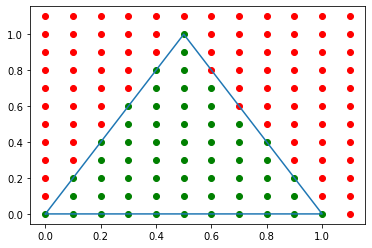

In [9]:
#TEST 2: I compile an array of spaced real values and use it to create a grid of points (with same abscissa and ordinate) 
       # I check whether or not they are internal to the triangle and plot
import numpy as np
import matplotlib.pyplot as plt 

point_list_x_T = []
point_list_y_T = []
point_list_x_F = []
point_list_y_F = []
t1 = np.arange(0.0, 1.2, 0.1)
#for i in range(0, 12):
 #   for j in range (0, 12):
  #      x = i * 0.2 
   #     y = j * 0.2
for x in t1:
    for y in t1:
        pnt = (x, y)
        #print("Is the point ({0}, {1}) inside the triangle ABC? ".format(pnt[0], pnt[1]),tri.in_triangle(pnt[0], pnt[1]))
        if tri.in_triangle(pnt[0], pnt[1]) is True:
            point_list_x_T.append(pnt[0])
            point_list_y_T.append(pnt[1])
        else:
            point_list_x_F.append(pnt[0])
            point_list_y_F.append(pnt[1])
            

plt.plot([0, 1, 0.5, 0], [0, 0, 1, 0])
plt.scatter(point_list_x_T ,point_list_y_T,color='green')
plt.scatter(point_list_x_F ,point_list_y_F,color='red')
#plt.axis([0, 6, 0, 20])
plt.show()

I note that some points on the frontier seem not to belong to the triangle. However, this may be due to three possible reasons: 

1- it is just a graphical display problem, the dots are bold but actually centered outside the triangle; ---> update : just change the size and see that the problem remains 

2- it is an approximation problem, i.e. for small discrepancies due to machine error the values on the frontier can become to be inside or outside the triangle at random; 

3- I have a problem with my algorithm (but I am confident that this will not happen :) )

It would be nice to calculate an index that shows me the efficiency of the algorithm by evaluating the percentage of errors I get.

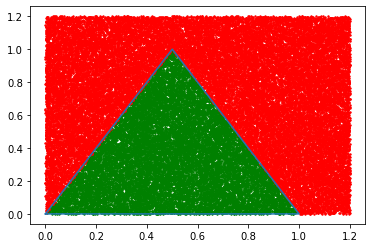

In [10]:
#TEST 3: I create random points with uniform distribution in (0, 1.2) and repeat the previous method 
import random as rnd

point_list_x_T = []
point_list_y_T = []
point_list_x_F = []
point_list_y_F = []


for i in range(1, 50001): #let's try using 50'000 points uniformly distributed in [0,1.2] interval
    n1 = rnd.uniform(0,1.2)
    n2 = rnd.uniform(0,1.2)
    p = (n1,n2)
    
    if tri.in_triangle(p[0], p[1]) is True:
        point_list_x_T.append(p[0])
        point_list_y_T.append(p[1])
    else:
        point_list_x_F.append(p[0])
        point_list_y_F.append(p[1])    

plt.plot([0, 1, 0.5, 0], [0, 0, 1, 0])            
plt.scatter(point_list_x_T ,point_list_y_T,color='green',s=2)
plt.scatter(point_list_x_F ,point_list_y_F,color='red',s=2)
#plt.axis([0, 6, 0, 20])
plt.show()
